## Step 2: Calculate Perplexity from Cross-Entropy

Formula: `Perplexity = 2^(Cross-Entropy in bits)`

# Perplexity Calculation Tutorial

**Execution Time:** <3 minutes
**Cost:** $0 (uses pre-calculated data)

## Learning Objectives

- Calculate perplexity from cross-entropy
- Visualize perplexity vs model size
- Detect data contamination using perplexity analysis

## Prerequisites

- Completed `language_modeling_metrics.md`
- Basic Python and matplotlib

In [7]:
# Setup: Import libraries
import json
import math
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

print("✅ Setup complete")

✅ Setup complete


## Step 1: Load Pre-calculated Perplexity Data

In [8]:
# Load sample perplexity results
with open('data/sample_perplexity_results.json', 'r') as f:
    data = json.load(f)

models = data['models']
print(f"Loaded data for {len(models)} models:")
for model in models:
    print(f"  - {model['model_name']} ({model['parameters']})")

Loaded data for 4 models:
  - GPT-2 Small (117M)
  - GPT-2 Medium (345M)
  - GPT-2 Large (762M)
  - GPT-2 XL (1542M)


In [9]:
def calculate_perplexity(cross_entropy_bits: float) -> float:
    """Calculate perplexity from cross-entropy in bits."""
    return 2 ** cross_entropy_bits

def calculate_cross_entropy(perplexity: float) -> float:
    """Calculate cross-entropy from perplexity."""
    return math.log2(perplexity)

# Test with GPT-2 Small on WikiText-2
ce = models[0]['results']['wikitext2']['cross_entropy_bits']
ppl = models[0]['results']['wikitext2']['perplexity']

calculated_ppl = calculate_perplexity(ce)
calculated_ce = calculate_cross_entropy(ppl)

print(f"Cross-Entropy: {ce:.2f} bits")
print(f"Perplexity (from data): {ppl:.2f}")
print(f"Perplexity (calculated): {calculated_ppl:.2f}")
print(f"Cross-Entropy (back-calculated): {calculated_ce:.2f} bits")
print(f"\n✅ Conversion formulas work correctly!")

Cross-Entropy: 4.88 bits
Perplexity (from data): 29.41
Perplexity (calculated): 29.45
Cross-Entropy (back-calculated): 4.88 bits

✅ Conversion formulas work correctly!


## Step 3: Visualize Perplexity vs Model Size

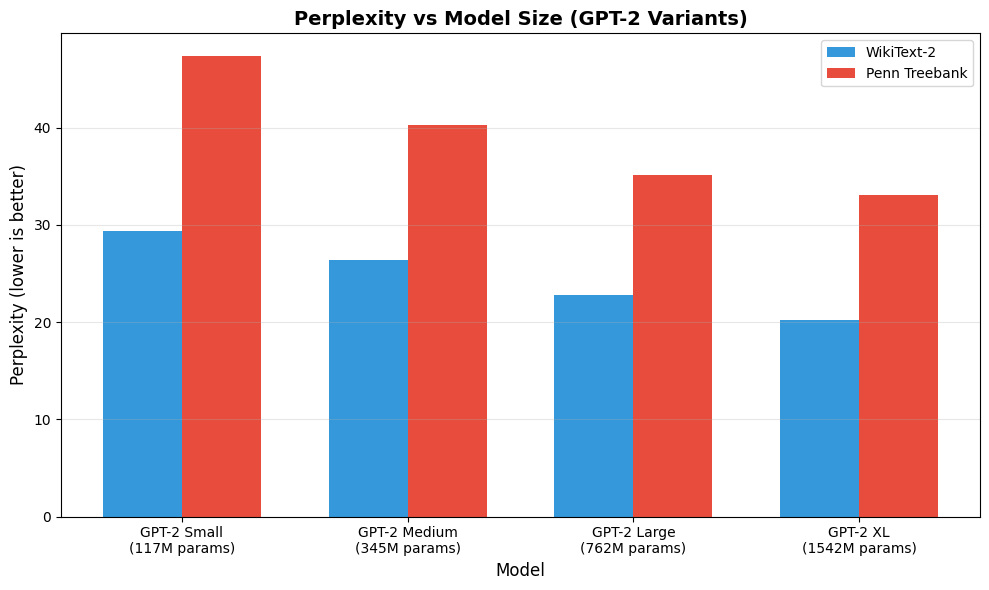

📊 Observation: Perplexity decreases as model size increases
   117M → 1542M: 9.15 reduction (31.1%)


In [10]:
# Extract data for WikiText-2
model_names = [m['model_name'] for m in models]
params = [int(m['parameters'].replace('M', '')) for m in models]
wikitext2_ppls = [m['results']['wikitext2']['perplexity'] for m in models]
ptb_ppls = [m['results']['ptb']['perplexity'] for m in models]

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(model_names))
width = 0.35

ax.bar(x - width/2, wikitext2_ppls, width, label='WikiText-2', color='#3498db')
ax.bar(x + width/2, ptb_ppls, width, label='Penn Treebank', color='#e74c3c')

ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Perplexity (lower is better)', fontsize=12)
ax.set_title('Perplexity vs Model Size (GPT-2 Variants)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([f"{name}\n({p}M params)" for name, p in zip(model_names, params)])
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Observation: Perplexity decreases as model size increases")
print(f"   117M → 1542M: {wikitext2_ppls[0] - wikitext2_ppls[-1]:.2f} reduction ({((wikitext2_ppls[0] - wikitext2_ppls[-1]) / wikitext2_ppls[0] * 100):.1f}%)")

## Step 4: Scaling Trends Analysis

In [11]:
# Analyze diminishing returns
improvements = []
for i in range(1, len(wikitext2_ppls)):
    prev_ppl = wikitext2_ppls[i-1]
    curr_ppl = wikitext2_ppls[i]
    improvement = (prev_ppl - curr_ppl) / prev_ppl * 100
    improvements.append(improvement)
    param_increase = params[i] / params[i-1]
    print(f"{model_names[i-1]:15} → {model_names[i]:15}: {improvement:5.1f}% improvement ({param_increase:.1f}× parameters)")

print(f"\n📈 Trend: Diminishing returns as models scale")
print(f"   First jump:  {improvements[0]:.1f}% (117M → 345M)")
print(f"   Second jump: {improvements[1]:.1f}% (345M → 762M)")
print(f"   Third jump:  {improvements[2]:.1f}% (762M → 1542M)")

GPT-2 Small     → GPT-2 Medium   :  10.3% improvement (2.9× parameters)
GPT-2 Medium    → GPT-2 Large    :  13.7% improvement (2.2× parameters)
GPT-2 Large     → GPT-2 XL       :  11.0% improvement (2.0× parameters)

📈 Trend: Diminishing returns as models scale
   First jump:  10.3% (117M → 345M)
   Second jump: 13.7% (345M → 762M)
   Third jump:  11.0% (762M → 1542M)


## Step 5: Data Contamination Detection

In [12]:
# Analyze contamination data
contamination = data['contamination_analysis']

mmlu_ppl = contamination['mmlu_benchmark']['observed_perplexity']
expected_range = contamination['mmlu_benchmark']['expected_perplexity_range']
held_out_ppl = contamination['held_out_test']['observed_perplexity']

print("🔍 Data Contamination Analysis")
print(f"\nMMLU Benchmark:")
print(f"  Expected range: {expected_range[0]}-{expected_range[1]}")
print(f"  Observed: {mmlu_ppl}")
print(f"  ⚠️  SUSPICIOUS: {mmlu_ppl} << {expected_range[0]} (much lower than expected)")
print(f"\nHeld-out Test Set (post-2019):")
print(f"  Observed: {held_out_ppl}")
print(f"  ✅ NORMAL: Within expected range for unseen data")
print(f"\n💡 Interpretation: MMLU questions likely appeared in GPT-2 training data")
print(f"   Ratio: {held_out_ppl / mmlu_ppl:.1f}× higher perplexity on clean data")

🔍 Data Contamination Analysis

MMLU Benchmark:
  Expected range: 35-50
  Observed: 8.7
  ⚠️  SUSPICIOUS: 8.7 << 35 (much lower than expected)

Held-out Test Set (post-2019):
  Observed: 42.3
  ✅ NORMAL: Within expected range for unseen data

💡 Interpretation: MMLU questions likely appeared in GPT-2 training data
   Ratio: 4.9× higher perplexity on clean data


## Summary and Key Takeaways

✅ **What we learned:**

1. **Perplexity = 2^(Cross-Entropy)** → Simple conversion formula
2. **Scaling improves perplexity** but with diminishing returns
3. **Contamination detection:** Unusually low perplexity (<10) suggests data leakage
4. **Dataset matters:** Same model has different perplexity on different datasets

**Next Steps:**
- Read `exact_evaluation_methods.md` to learn similarity measurements
- Run `similarity_measurements_tutorial.ipynb` for hands-on practice